In [13]:
import pandas as pd
import numpy as np
import glob 
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

# Read data

In [6]:
df = pd.read_csv('10.csv')

In [7]:
df.head()

started_at                          ended_at  \
0  2022-10-01 03:00:32.130000+00:00  2022-10-01 03:07:43.297000+00:00   
1  2022-10-01 03:05:47.242000+00:00  2022-10-01 03:10:25.729000+00:00   
2  2022-10-01 03:28:22.533000+00:00  2022-10-01 03:32:17.182000+00:00   
3  2022-10-01 03:41:23.614000+00:00  2022-10-01 03:47:32.421000+00:00   
4  2022-10-01 03:56:53.494000+00:00  2022-10-01 04:04:39.583000+00:00   

   duration  start_station_id          start_station_name  \
0       431               421   Alexander Kiellands Plass   
1       278               396                 Kirkeristen   
2       234              1023  Professor Aschehougs plass   
3       368               408                 Tøyen skole   
4       466               447                 Kværnerbyen   

  start_station_description  start_station_latitude  start_station_longitude  \
0       langs Maridalsveien               59.928067                10.751203   
1              ved Torggata               59.913000                10.746761   
2     ved Kristian IVs gate               59.914767                10.740971   
3   forsiden av skolebygget               59.914943                10.773977   
4       langs Smeltedigelen               59.904473                10.786167   

   end_station_id       end_station_name end_station_description  \
0             392  Sjøsiden ved fontenen                  Oslo S   
1             500            Anker Hotel          langs Storgata   
2             530         Holbergs plass      ved Welhavens gate   
3             506     Botanisk Hage vest         ved Blytts gate   
4             443   Sjøsiden ved trappen                  Oslo S   

   end_station_latitude  end_station_longitude  
0             59.910181              10.751699  
1             59.917279              10.758155  
2             59.919309              10.734305  
3             59.920128              10.768875  
4             59.910154              10.751981

In [42]:
df.dtypes

started_at                   datetime64[ns, UTC]
ended_at                     datetime64[ns, UTC]
duration                                   int64
start_station_id                           int64
start_station_name                        object
start_station_description                 object
start_station_latitude                   float64
start_station_longitude                  float64
end_station_id                             int64
end_station_name                          object
end_station_description                   object
end_station_latitude                     float64
end_station_longitude                    float64
started_day                       datetime64[ns]
dtype: object

In [9]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [10]:
df['started_day'] = df['started_at'].dt.date

In [11]:
df['started_day'] = pd.to_datetime(df['started_day'])

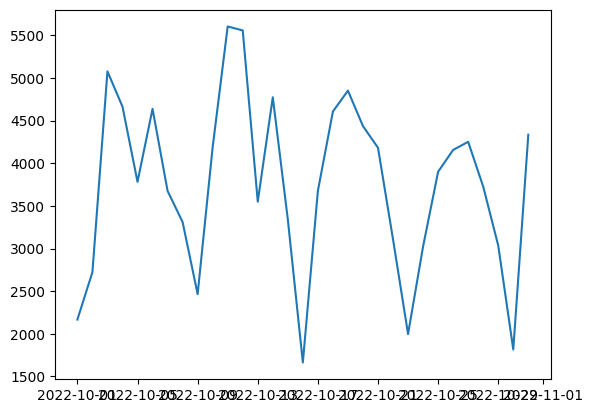

In [14]:
plt.plot(df['started_day'].value_counts().sort_index());

In [15]:
df1 = df[df['started_day'] == '2022-10-01']

In [22]:
len(df1)

2167

In [16]:
df1['end_station_id'].nunique()

250

In [17]:
df1['start_station_id'].nunique()

246

In [21]:
df1.sort_values('start_station_id')

started_at                         ended_at  \
1814 2022-10-01 18:04:34.411000+00:00 2022-10-01 18:11:44.165000+00:00   
885  2022-10-01 12:43:40.021000+00:00 2022-10-01 12:51:12.295000+00:00   
642  2022-10-01 11:18:00.771000+00:00 2022-10-01 11:22:43.992000+00:00   
1936 2022-10-01 19:41:30.710000+00:00 2022-10-01 19:54:22.534000+00:00   
730  2022-10-01 11:48:52.165000+00:00 2022-10-01 11:54:43.486000+00:00   
1456 2022-10-01 16:00:22.630000+00:00 2022-10-01 16:28:50.442000+00:00   
888  2022-10-01 12:45:05.345000+00:00 2022-10-01 12:53:48.648000+00:00   
1055 2022-10-01 13:51:35.903000+00:00 2022-10-01 14:38:21.784000+00:00   
1673 2022-10-01 17:06:32.578000+00:00 2022-10-01 17:13:12.133000+00:00   
913  2022-10-01 12:53:33.247000+00:00 2022-10-01 13:07:12.667000+00:00   
26   2022-10-01 05:09:56.940000+00:00 2022-10-01 05:15:23.604000+00:00   
1275 2022-10-01 15:05:17.362000+00:00 2022-10-01 15:09:59.732000+00:00   
549  2022-10-01 10:38:28.787000+00:00 2022-10-01 10:40:08.800000+00:00   
1346 2022-10-01 15:29:17.838000+00:00 2022-10-01 16:26:18.632000+00:00   
384  2022-10-01 09:37:12.147000+00:00 2022-10-01 09:44:34.721000+00:00   
2037 2022-10-01 21:24:02.517000+00:00 2022-10-01 21:29:38.223000+00:00   
558  2022-10-01 10:40:22.654000+00:00 2022-10-01 10:56:11.313000+00:00   
1065 2022-10-01 13:55:00.338000+00:00 2022-10-01 14:06:34.499000+00:00   
371  2022-10-01 09:32:01.706000+00:00 2022-10-01 09:42:17.596000+00:00   
370  2022-10-01 09:31:27.218000+00:00 2022-10-01 09:39:36.914000+00:00   
1376 2022-10-01 15:39:06.653000+00:00 2022-10-01 15:45:22.126000+00:00   
1414 2022-10-01 15:50:01.408000+00:00 2022-10-01 15:55:16.775000+00:00   
571  2022-10-01 10:44:25.411000+00:00 2022-10-01 10:55:29.793000+00:00   
1982 2022-10-01 20:43:16.231000+00:00 2022-10-01 20:51:13.189000+00:00   
1590 2022-10-01 16:43:00.913000+00:00 2022-10-01 17:03:01.149000+00:00   
1487 2022-10-01 16:09:10.212000+00:00 2022-10-01 16:14:28.660000+00:00   
597  2022-10-01 10:55:43.272000+00:00 2022-10-01 11:01:03.376000+00:00   
1513 2022-10-01 16:18:37.217000+00:00 2022-10-01 16:24:57.322000+00:00   
807  2022-10-01 12:17:17.276000+00:00 2022-10-01 12:24:20.395000+00:00   
136  2022-10-01 07:22:30.414000+00:00 2022-10-01 07:29:18.397000+00:00   
1525 2022-10-01 16:22:14.826000+00:00 2022-10-01 16:27:59.962000+00:00   
137  2022-10-01 07:22:37.881000+00:00 2022-10-01 07:27:07.160000+00:00   
1591 2022-10-01 16:43:05.933000+00:00 2022-10-01 16:54:29.187000+00:00   
497  2022-10-01 10:14:56.915000+00:00 2022-10-01 10:19:52.286000+00:00   
1477 2022-10-01 16:07:05.468000+00:00 2022-10-01 16:26:35.222000+00:00   
997  2022-10-01 13:33:33.877000+00:00 2022-10-01 13:36:30.633000+00:00   
1305 2022-10-01 15:16:12.541000+00:00 2022-10-01 15:22:38.994000+00:00   
460  2022-10-01 10:04:40.801000+00:00 2022-10-01 10:19:29.099000+00:00   
280  2022-10-01 08:43:54.639000+00:00 2022-10-01 08:47:53.449000+00:00   
1195 2022-10-01 14:42:07.152000+00:00 2022-10-01 15:09:40.430000+00:00   
282  2022-10-01 08:44:08.831000+00:00 2022-10-01 08:50:12.468000+00:00   
1232 2022-10-01 14:54:23.792000+00:00 2022-10-01 14:57:01.836000+00:00   
1744 2022-10-01 17:39:25.604000+00:00 2022-10-01 17:45:46.712000+00:00   
2165 2022-10-01 22:58:28.413000+00:00 2022-10-01 23:16:22.861000+00:00   
1630 2022-10-01 16:53:21.569000+00:00 2022-10-01 17:00:12.631000+00:00   
1608 2022-10-01 16:47:24.795000+00:00 2022-10-01 16:55:50.369000+00:00   
287  2022-10-01 08:46:14.610000+00:00 2022-10-01 08:58:16.340000+00:00   
845  2022-10-01 12:30:51.745000+00:00 2022-10-01 12:42:20.992000+00:00   
1770 2022-10-01 17:48:36.060000+00:00 2022-10-01 18:03:10.802000+00:00   
1792 2022-10-01 17:54:09.337000+00:00 2022-10-01 18:04:18.057000+00:00   
386  2022-10-01 09:38:25.567000+00:00 2022-10-01 09:48:57.972000+00:00   
1007 2022-10-01 13:36:36.717000+00:00 2022-10-01 13:48:01.422000+00:00   
184  2022-10-01 07:49:46.476000+00:00 2022-10-01 07:57:03.891000+00:00   
623  2022-10-01 11:07:56.865000

In [24]:
df_group = df1.groupby('start_station_id').agg({'start_station_id':[('From', lambda x:len(x))],
                                                   'start_station_latitude':[('lat', lambda x: x.max())],
                                                   'start_station_longitude':[('lon', lambda x: x.max())]})

In [26]:
df_group.reset_index(inplace=True)

In [28]:
df_group.columns = ['Station', 'number_of_trip', 'lat', 'lon']

In [29]:
df_group

Station  number_of_trip        lat        lon
0        377               4  59.915667  10.777567
1        378               5  59.929843  10.711285
2        380              11  59.939230  10.759170
3        381              22  59.912520  10.762240
4        382              11  59.929586  10.732839
5        383              17  59.934936  10.749466
6        384              24  59.919440  10.743765
7        385              16  59.918632  10.757867
8        387               4  59.914586  10.735453
9        388              11  59.916331  10.716349
10       389               6  59.920553  10.734285
11       390               7  59.914240  10.732771
12       391              16  59.926871  10.738463
13       392               9  59.910181  10.751699
14       393               2  59.939244  10.774319
15       394              21  59.943778  10.760121
16       396              19  59.913000  10.746761
17       397              17  59.946710  10.773805
18       398              26  59.928434  10.759430
19       399               4  59.929545  10.748986
20       400               5  59.919927  10.735428
21       401               5  59.920259  10.760629
22       402               7  59.930877  10.791824
23       403              11  59.921768  10.730476
24       404               2  59.914306  10.720202
25       405               3  59.928080  10.708767
26       406              14  59.925070  10.775996
27       407               8  59.937743  10.751648
28       408              31  59.914943  10.773977
29       409               3  59.940398  10.730036
30       410              18  59.929005  10.749676
31       411               9  59.923240  10.792831
32       412              16  59.917866  10.754898
33       413              17  59.929045  10.716926
34       414               5  59.910242  10.738570
35       415              11  59.929542  10.781053
36       416               4  59.932383  10.741475
37       417               1  59.922485  10.720896
38       418               5  59.907674  10.686843
39       420               7  59.940329  10.766137
40       421              47  59.928067  10.751203
41       423              20  59.920335  10.760804
42       424              23  59.925611  10.760926
43       425               3  59.932792  10.734457
44       426              11  59.917281  10.708376
45       427               9  59.920218  10.717978
46       428               3  59.919334  10.696895
47       429               3  59.922080  10.685880
48       430               1  59.913720  10.735887
49       431               8  59.927292  10.773185
50       432               2  59.924821  10.739909
51       433               6  59.931828  10.748745
52       434               1  59.935888  10.735006
53       435               7  59.915424  10.714577
54       436              12  59.924403  10.713069
55       437               7  59.915468  10.751141
56       438               7  59.949239  10.768576
57       439              22  59.928393  10.755969
58       442              10  59.922510  10.751010
59       443              12  59.910154  10.751981
60       444              31  59.925265  10.750462
61       445               3  59.921673  10.676660
62       446              31  59.925471  10.731219
63       447              15  59.904473  10.786167
64       448               8  59.912183  10.754434
65       449               4  59.913575  10.726230
66       450              12  59.919524  10.708840
67       451               4  59.929419  10.726195
68       452               2  59.903989  10.740627
69       453               6  59.927538  10.710263
70       454               1  59.919810  10.651118
71       455               7  59.922337  10.761750
72       456               9  59.910356  10.705106
73       457               9  59.923058  10.771719
74       458              14  59.928349  10.778370
75       459               6  59.928132  10.718420
76       460              24  59.915418  10.769330
77       461               

# Load the .geojson file for Gamle Oslo polygon and Oslo polygon

Polygon can be taken from  http://nominatim.openstreetmap.org/

Then save it as text-file

In [19]:
import json

In [20]:
with open('polygon_Oslo.geojson') as f:
    oslo = json.load(f)

# Map the addresses with folium (Circle)

Should use the dataframe with count for this

In [30]:
import folium

Gamle Oslo:
 - 59.8992367, 10.7347673396537
 - 59.91277778, 10.78194444


In [32]:
m = folium.Map(
    #Bydel Gamle Oslo position
    location=[59.8992367, 10.7347673396537],
    zoom_start=12,
    tiles='OpenStreetMap'
)

#folium.GeoJson(oslo).add_to(m)

for i in range(len(df_group)):
    
    folium.Circle(location=[df_group['lat'][i], df_group['lon'][i]],
                        popup=df_group['Station'][i], tooltip=None,
                        radius=int(df_group['number_of_trip'][i]), 
                        color='red', fill=True, fill_color='red').add_to(m)
    

#m.save('mymap.html')
m

## Heatmap with Folium

Should use the dataframe with single points for this

In [40]:
m = folium.Map(
    #Bydel Gamle Oslo position
    location=[59.8992367, 10.7347673396537],
    zoom_start=12,
    tiles='OpenStreetMap'
)


#folium.GeoJson(oslo, name = 'Oslo').add_to(m)

heat_privat = list(df1[['start_station_latitude', 'start_station_longitude']].values)
markers_1 = plugins.MarkerCluster(locations = heat_privat, name = "Start station", maxZoom = 50)
m.add_child(markers_1)

"""heat_kommune = list(cor_single_kommune[['latitude', 'longitude']].values)
markers_2 = plugins.MarkerCluster(locations = heat_kommune, name = "Kommunal bolig", maxZoom = 50)
m.add_child(markers_2)"""

folium.LayerControl().add_to(m)
m.save('Adresser med to lag.html')
m
    

# Choropleth map on street level

In [23]:
cor_single_privat.head()

level_0  index       Postadresse Husnummer Adressedetaljer Poststed  \
2302     2386   2427     1/963 Karbala       NaN            Irak      NaN   
1309     1356   1377  Agmund Bolts vei        59             NaN     oslo   
1440     1489   1513  Agmund Bolts vei        59             NaN     oslo   
565       585    597       Alnafetgata         3             NaN     oslo   
614       635    648       Alnafetgata         3             NaN     oslo   

     Postnummer   Eie-/leieform   Boligtype                        full_add  \
2302       0000           Annet       Annet          1/963 karbala, nan nan   
1309       0664  Kommunal bolig   Leilighet  agmund bolts vei 59, 0664 oslo   
1440       0664           Annet  Behandling  agmund bolts vei 59, 0664 oslo   
565        0192           Leier   Leilighet        alnafetgata 3, 0192 oslo   
614        0192           Leier   Leilighet        alnafetgata 3, 0192 oslo   

               riktig_add                       cor   latitude  longitude  
2302        1/963 karbala  (32.6156423, 44.0348194)  32.615642  44.034819  
1309  agmund bolts vei 59  (59.9169027, 10.8110696)  59.916903  10.811070  
1440  agmund bolts vei 59  (59.9169027, 10.8110696)  59.916903  10.811070  
565         alnafetgata 3     (59.90282, 10.772144)  59.902820  10.772144  
614         alnafetgata 3     (59.90282, 10.772144)  59.902820  10.772144

In [36]:
post_privat = pd.DataFrame(pd.pivot_table(cor_single_privat, values = 'level_0', index = 'Postnummer', aggfunc = lambda x: x.nunique()))


In [38]:
post_privat.reset_index(inplace = True)

In [57]:
post_privat['postnummer'] = post_privat['Postnummer'].apply(lambda x: str(int(x)))

In [58]:
post_privat

Postnummer  level_0 postnummer
0         0000        5          0
1         0107        1        107
2         0109        1        109
3         0134        1        134
4         0150        1        150
5         0152        2        152
6         0165        4        165
7         0166        2        166
8         0167        1        167
9         0168        2        168
10        0170        1        170
11        0171        2        171
12        0172        1        172
13        0174        1        174
14        0175        1        175
15        0176        1        176
16        0177       10        177
17        0181        1        181
18        0182        2        182
19        0183        4        183
20        0186        1        186
21        0187      137        187
22        0188      145        188
23        0190      145        190
24        0191       33        191
25        0192      105        192
26        0193       36        193
27        0194       27        194
28        0195       30        195
29        0196      114        196
30        0198        1        198
31        0253        1        253
32        0254        1        254
33        0256        1        256
34        0257        1        257
35        0263        1        263
36        0264        1        264
37        0266        1        266
38        0267        1        267
39        0270        2        270
40        0271        1        271
41        0275        3        275
42        0276        1        276
43        0283        1        283
44        0351        1        351
45        0352        1        352
46        0354        4        354
47        0355        1        355
48        0356        2        356
49        0357        1        357
50        0364        1        364
51        0365        2        365
52        0368        2        368
53        0376        1        376
54        0377        1        377
55        0445        1        445
56        0450        1        450
57        0452        1        452
58        0460        1        460
59        0463        2        463
60        0467        1        467
61        0468        5        468
62        0474        3        474
63        0475        3        475
64        0479        6        479
65        0480        1        480
66        0482        3        482
67        0484        1        484
68        0485        1        485
69        0487        1        487
70        0491        1        491
71        0495        1        495
72        0550        4        550
73        0552        1        552
74        0554        1        554
75        0556        5        556
76        0557        2        557
77        0558        1        558
78        0560        8        560
79        0561       98        561
80        0562        2        562
81        0563        1        563
82        0565        1        565
83        0567        1        567
84        0568        2        568
85        0570        2        570
86        0572        2        572
87        0573        1        573
88        0574        2        574
89        0576        1        576
90        0577       47        577
91        0578       24        578
92        0579        1        579
93        0580        2        580
94        0583        2        583
95        0584        1        584
96        0585        6        585
97        0586        2        586
98        0596        1        596
99        0597        2        597
100       0598        2        598
101       0608        1        608
102       0650      122        650
103       0651        7        651
104       0652      129        652
105       0653       52        653
106       0654       30        654
107       0655       87        655
108       0656      101        656
109       0657       67        657
110       0658       75        658
111       0659       29        659
112       0660       13        660
113       0661

In [112]:
len(post_privat)

224

In [70]:
for feature in oslo["features"]:
    props = feature["properties"]
    print("kommune %s, postnnummer %s, poststed %s" % (props["kommune"], props["postnummer"], props["poststedsnavn"]))

kommune 301, postnnummer 660, poststed OSLO
kommune 301, postnnummer 560, poststed OSLO
kommune 301, postnnummer 274, poststed OSLO
kommune 301, postnnummer 265, poststed OSLO
kommune 301, postnnummer 256, poststed OSLO
kommune 301, postnnummer 186, poststed OSLO
kommune 301, postnnummer 157, poststed OSLO
kommune 301, postnnummer 460, poststed OSLO
kommune 301, postnnummer 553, poststed OSLO
kommune 301, postnnummer 1069, poststed OSLO
kommune 301, postnnummer 1071, poststed OSLO
kommune 301, postnnummer 652, poststed OSLO
kommune 301, postnnummer 657, poststed OSLO
kommune 301, postnnummer 1160, poststed OSLO
kommune 301, postnnummer 349, poststed OSLO
kommune 301, postnnummer 757, poststed OSLO
kommune 301, postnnummer 764, poststed OSLO
kommune 301, postnnummer 750, poststed OSLO
kommune 301, postnnummer 864, poststed OSLO
kommune 301, postnnummer 157, poststed OSLO
kommune 301, postnnummer 461, poststed OSLO
kommune 301, postnnummer 158, poststed OSLO
kommune 301, postnnummer 985,

In [104]:
post_list = []
for feature in oslo["features"]:
    props = feature["properties"]
    post_list.append(props['postnummer'])

In [105]:
post_list = pd.DataFrame(post_list, columns = ['postnummer'])

In [107]:
post_list['level_0'] = 0

In [109]:
post_list['Postnummer'] = post_list['postnummer'].apply(lambda x: '{0:0>4}'.format(x))

In [111]:
len(post_list)

509

In [110]:
post_list

postnummer  level_0 Postnummer
0           660        0       0660
1           560        0       0560
2           274        0       0274
3           265        0       0265
4           256        0       0256
5           186        0       0186
6           157        0       0157
7           460        0       0460
8           553        0       0553
9          1069        0       1069
10         1071        0       1071
11          652        0       0652
12          657        0       0657
13         1160        0       1160
14          349        0       0349
15          757        0       0757
16          764        0       0764
17          750        0       0750
18          864        0       0864
19          157        0       0157
20          461        0       0461
21          158        0       0158
22          985        0       0985
23          763        0       0763
24          185        0       0185
25          783        0       0783
26          177        0       0177
27         1153        0       1153
28          955        0       0955
29          556        0       0556
30          758        0       0758
31         1158        0       1158
32          856        0       0856
33          458        0       0458
34          570        0       0570
35           15        0       0015
36          483        0       0483
37          264        0       0264
38          577        0       0577
39          566        0       0566
40          661        0       0661
41          559        0       0559
42          457        0       0457
43           26        0       0026
44          363        0       0363
45          566        0       0566
46         1064        0       1064
47         1063        0       1063
48          756        0       0756
49          489        0       0489
50          139        0       0139
51          594        0       0594
52          677        0       0677
53         1165        0       1165
54         1065        0       1065
55         1089        0       1089
56          151        0       0151
57           37        0       0037
58         1274        0       1274
59          683        0       0683
60          193        0       0193
61         1172        0       1172
62          363        0       0363
63          557        0       0557
64          363        0       0363
65          851        0       0851
66          972        0       0972
67          875        0       0875
68          984        0       0984
69          862        0       0862
70          158        0       0158
71         1067        0       1067
72         1056        0       1056
73         1051        0       1051
74          693        0       0693
75          884        0       0884
76         1252        0       1252
77         1054        0       1054
78         1055        0       1055
79          585        0       0585
80          174        0       0174
81          157        0       0157
82          194        0       0194
83          272        0       0272
84          860        0       0860
85          882        0       0882
86         1254        0       1254
87          598        0       0598
88          891        0       0891
89          968        0       0968
90          956        0       0956
91          357        0       0357
92          359        0       0359
93          665        0       0665
94         1278        0       1278
95          252        0       0252
96          567        0       0567
97          279        0       0279
98          782        0       0782
99          552        0       0552
100        1176        0       1176
101         491        0       0491
102         445        0       0445
103         779        0       0779
104         282        0       0282
105         760        0       0760
106         496        0       0496
107         581        0       0581
108         850        0       0850
109         461        0       0461
110      

In [117]:
post_privat = pd.concat([post_privat, post_list])

In [126]:
post_privat.sort_values('level_0', ascending = False)

Postnummer  level_0 postnummer
23        0190      145        190
22        0188      145        188
21        0187      137        187
104       0652      129        652
113       0661      125        661
102       0650      122        650
29        0196      114        196
25        0192      105        192
108       0656      101        656
79        0561       98        561
107       0655       87        655
110       0658       75        658
109       0657       67        657
105       0653       52        653
90        0577       47        577
26        0193       36        193
24        0191       33        191
28        0195       30        195
106       0654       30        654
111       0659       29        659
115       0663       29        663
27        0194       27        194
91        0578       24        578
112       0660       13        660
16        0177       10        177
78        0560        8        560
103       0651        7        651
64        0479        6        479
96        0585        6        585
75        0556        5        556
0         0000        5          0
61        0468        5        468
118       0667        5        667
121       0673        4        673
172       1275        4       1275
46        0354        4        354
6         0165        4        165
19        0183        4        183
72        0550        4        550
152       1069        4       1069
166       1251        3       1251
63        0475        3        475
141       0970        3        970
66        0482        3        482
124       0677        3        677
125       0678        3        678
123       0676        3        676
173       1281        3       1281
167       1254        3       1254
116       0664        3        664
62        0474        3        474
151       1068        3       1068
41        0275        3        275
52        0368        2        368
84        0568        2        568
86        0572        2        572
88        0574        2        574
39        0270        2        270
93        0580        2        580
94        0583        2        583
97        0586        2        586
99        0597        2        597
100       0598        2        598
18        0182        2        182
170       1266        2       1266
11        0171        2        171
120       0672        2        672
9         0168        2        168
7         0166        2        166
5         0152        2        152
126       0680        2        680
163       1169        2       1169
131       0751        2        751
136       0864        2        864
138       0955        2        955
139       0958        2        958
157       1155        2       1155
142       0973        2        973
143       0976        2        976
144       0983        2        983
147       0986        2        986
148       0987        2        987
154       1084        2       1084
85        0570        2        570
76        0557        2        557
59        0463        2        463
186       1725        2       1725
48        0356        2        356
197       2150        2       2150
80        0562        2        562
51        0365        2        365
178       1386        1       1386
162       1168        1       1168
189       1772        1       1772
164       1176        1       1176
223       9311        1       9311
165       1178        1       1178
160       1164        1       1164
199       2223        1       2223
222       8624        1       8624
188       1767        1       1767
187       1727        1       1727
221       8514        1       8514
161       1165        1       1165
198       2214        1       2214
159       1161        1       1161
168       1256        1       1256
158       1156        1       1156
190       1825        1       1825
1         0107        1        107
191       1970        1       1970
192       2008        1       2008
156       1151        1       1151
155       1088

In [133]:
from branca.colormap import linear

colormap = linear.YlGn_09.scale(
    post_privat['level_0'].min(), post_privat['level_0'].max()
)

print(colormap(100.0))

colormap

#31974f


In [119]:
post_dict = post_privat.set_index("postnummer")["level_0"].to_dict()


In [120]:
post_dict['165']

4

In [136]:
m = folium.Map([59.8992367, 10.7347673396537], zoom_start = 14)

folium.GeoJson(
    oslo,
    name="Privat bolig",
    style_function=lambda feature: {
        "fillColor": '#31974f', #colormap(post_dict[feature['properties']["postnummer"]]),
        "color": "red",
        "weight": 1,
        "dashArray": "5, 5",
        "fillOpacity": 0.1,
    },
).add_to(m)

colormap.caption = "Privat bolig scale"
colormap.add_to(m)


folium.LayerControl().add_to(m)

m

In [138]:

m = folium.Map([59.8992367, 10.7347673396537], zoom_start = 14)

folium.Choropleth(
    geo_data=oslo,
    data=post_privat,
    columns=["postnummer", "level_0"],
    key_on="feature.properties.postnummer",
    fill_color="YlGn",
    bins=[3, 4, 9, 11],
).add_to(m)

m

ValueError: All values are expected to fall into one of the provided bins (or to be Nan). Please check the `bins` parameter and/or your data.

In [ ]:
world_map = folium.Map(
        location=[59.8992367, 10.7347673396537],
        zoom_start=6,
        tiles='openstreetmap'
        )

world_map.choropleth(
        geo_data=data,
        data=oslo,
        columns=['POSTNR- OG STAD','FOLKETAL'],
        key_on='feature.properties.Suburb_Name',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Sosialhjelp mottakere'
        )


In [ ]:
bla bla